## *Integrando Planilhas do Excel.*

In [2]:
import pandas as pd

In [3]:
# Leitura dos arquivos
df1 = pd.read_excel("./datasets/Aracaju.xlsx")
df2 = pd.read_excel("./datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./datasets/Natal.xlsx")
df4 = pd.read_excel("./datasets/Recife.xlsx")
df5 = pd.read_excel("./datasets/Salvador.xlsx")

In [4]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [6]:
# Concatenar dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
# Recebe 5 amostras de forma aleatória do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
29,Natal,2019-03-09,646.00,854,2
70,Aracaju,2018-01-01,8.44,1523,9
107,Natal,2019-01-02,14.70,1035,1
8,Recife,2019-02-11,56.47,980,6
52,Salvador,2019-01-01,43.77,1036,2


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
# Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
10,Recife,2019-01-01,38.51,982,8
117,Natal,2019-01-02,39.41,1034,1
113,Aracaju,2018-01-01,23.05,1521,9
90,Recife,2019-01-01,16.04,980,1
126,Fortaleza,2019-03-02,41.87,980,8
64,Fortaleza,2019-01-01,110.31,1005,4
111,Aracaju,2018-01-01,24.25,1523,1
10,Salvador,2019-01-01,30.97,1036,1
159,Natal,2019-01-02,172.52,1035,1
76,Fortaleza,2019-01-01,38.61,1004,4


In [17]:
df["Vendas"].mean()

122.61180089485458

## *Criando novas colunas.*

In [18]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [21]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [22]:
# Retorna as n linhas com maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [23]:
# Retorna as n linhas com menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [24]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [25]:
# Ordenando o conjunto de dados, de forma crescente, pela receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [26]:
# Ordenando o conjunto de dados, de forma decrescente, pela receita
df.sort_values("Receita", ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
216,Natal,2019-01-02,5.82,1035,1,5.82
216,Salvador,2019-01-02,5.82,1035,1,5.82


## *Trabalhando com Datas.*

In [27]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [28]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [29]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,1514764800000000000,142.00,1520,1,142.00
1,Aracaju,1514764800000000000,14.21,1522,6,85.26
2,Aracaju,1514764800000000000,71.55,1520,1,71.55
3,Aracaju,1514764800000000000,3.01,1521,7,21.07
4,Aracaju,1514764800000000000,24.51,1522,8,196.08


In [31]:
# Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [32]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [33]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [34]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
16,Salvador,2019-01-01,32.47,1036,2,64.94,2019
178,Natal,2019-01-02,39.28,1037,3,117.84,2019
233,Natal,2019-01-03,172.40,1036,2,344.80,2019
78,Salvador,2019-01-01,111.20,1036,3,333.60,2019
170,Salvador,2019-01-02,9.26,1035,3,27.78,2019


In [37]:
# Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
228,Salvador,2019-01-02,6.87,1037,3,20.61,2019,1,2
31,Recife,2019-01-01,176.23,981,7,1233.61,2019,1,1
68,Natal,2018-06-22,274.00,852,3,822.00,2018,6,22
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2
10,Natal,2018-10-27,828.00,852,4,3312.00,2018,10,27


In [39]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
# Calculando a diferença entre datas
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
92,Salvador,2019-01-01,4.57,1035,1,4.57,2019,1,1,365 days
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days
11,Recife,2019-01-01,202.79,980,5,1013.95,2019,1,1,365 days
144,Natal,2019-01-02,23.38,1034,1,23.38,2019,1,2,366 days
103,Natal,2019-01-02,191.60,1034,1,191.60,2019,1,2,366 days


In [42]:
# Criando a coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
141,Salvador,2019-03-02,9.08,1036,1,9.08,2019,3,2,425 days,1
92,Natal,2019-01-02,4.57,1035,1,4.57,2019,1,2,366 days,1
54,Recife,2019-01-01,23.43,982,7,164.01,2019,1,1,365 days,1
157,Salvador,2019-01-02,150.17,1036,2,300.34,2019,1,2,366 days,1
43,Natal,2019-04-01,538.00,853,3,1614.00,2019,4,1,455 days,2


In [44]:
# Filtrando as vendas de 2019, mês de março
vendas_marco_2019 = df.loc[
    (df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)
]

In [45]:
vendas_marco_2019.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
133,Recife,2019-03-02,14.67,980,7,102.69,2019,3,2,425 days,1
127,Recife,2019-03-02,39.56,982,8,316.48,2019,3,2,425 days,1
134,Salvador,2019-03-02,125.90,1036,1,125.90,2019,3,2,425 days,1


## *Visualização de Dados.*

In [46]:
# Retorna a quantidade numérica de cada valor da coluna
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

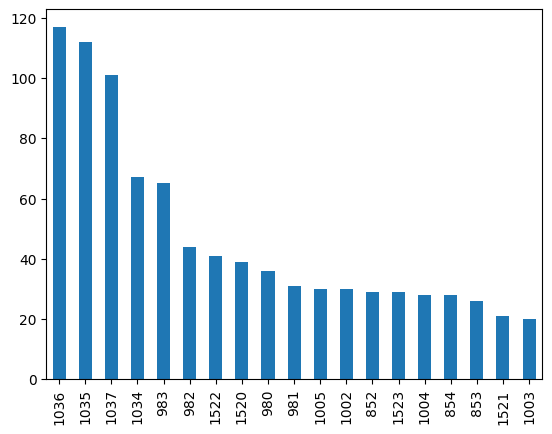

In [47]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

<Axes: >

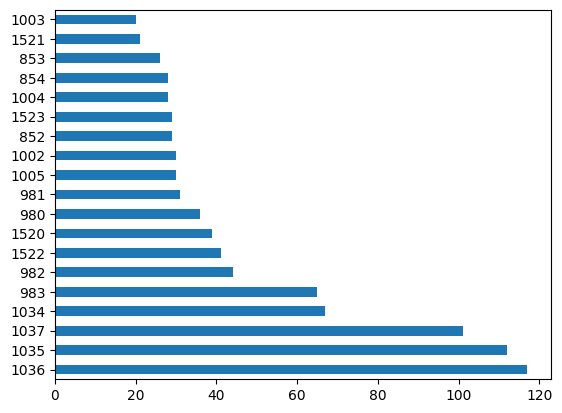

In [48]:
# Gráfico de barras horizontais
df['LojaID'].value_counts().plot.barh()

<Axes: >

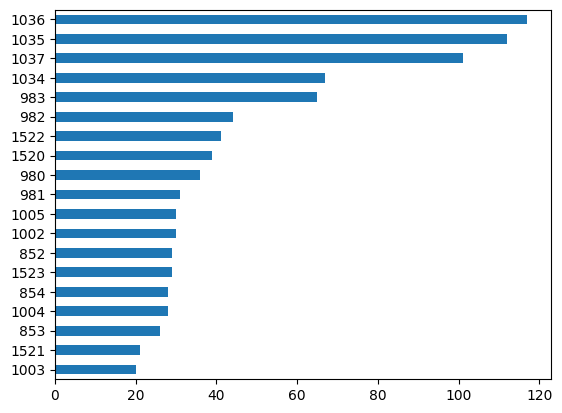

In [49]:
df['LojaID'].value_counts(ascending=True).plot.barh()

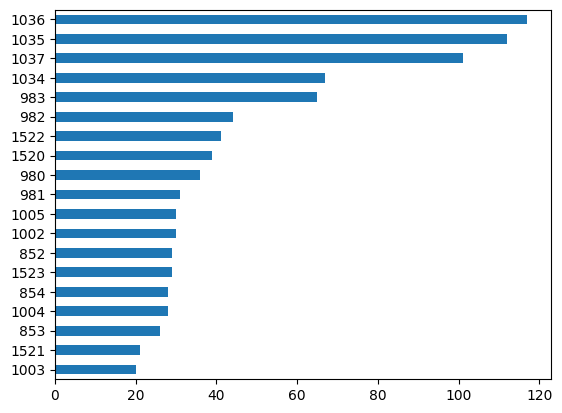

In [50]:
df['LojaID'].value_counts(ascending=True).plot.barh();

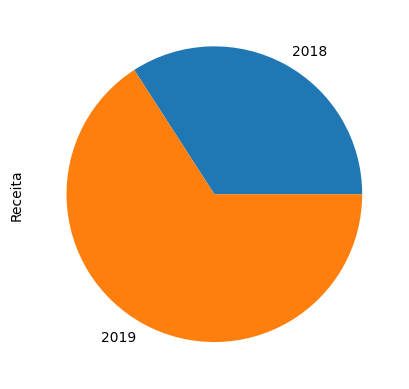

In [51]:
# Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [52]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

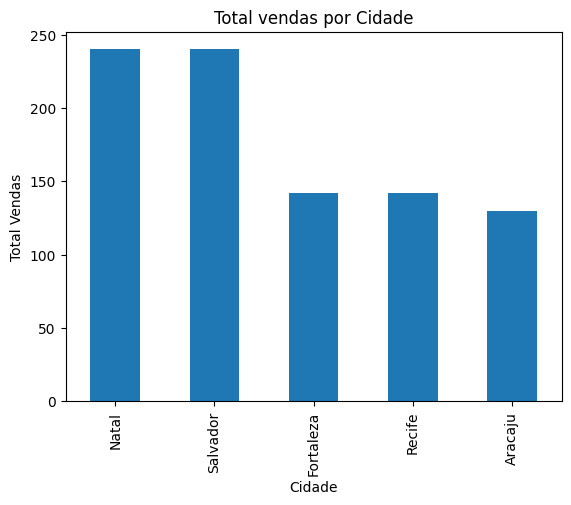

In [53]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

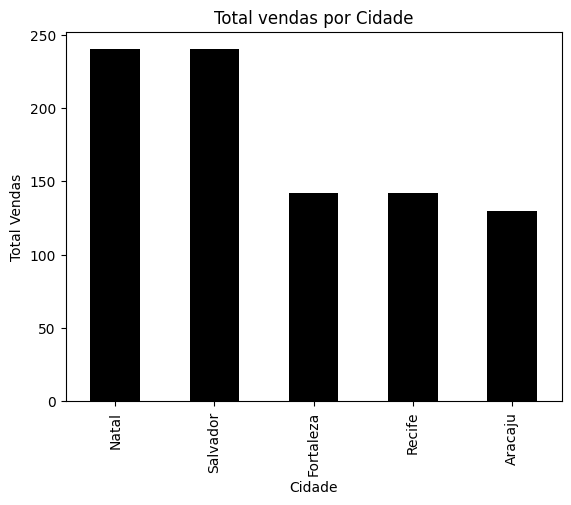

In [55]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade", color="black")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [56]:
# Alterando o estilo
plt.style.use("ggplot")

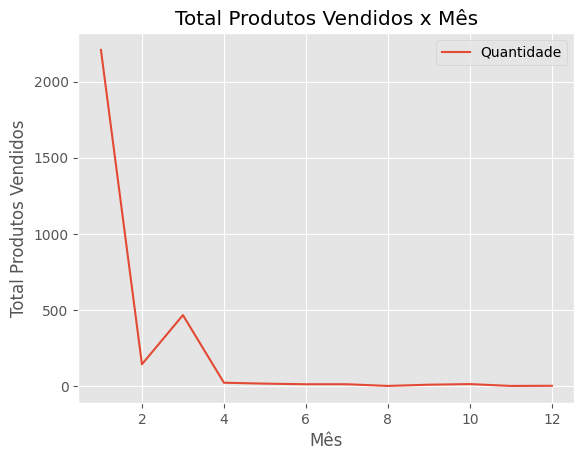

In [57]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total Produtos Vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend(['Quantidade']);

In [58]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [59]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [60]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

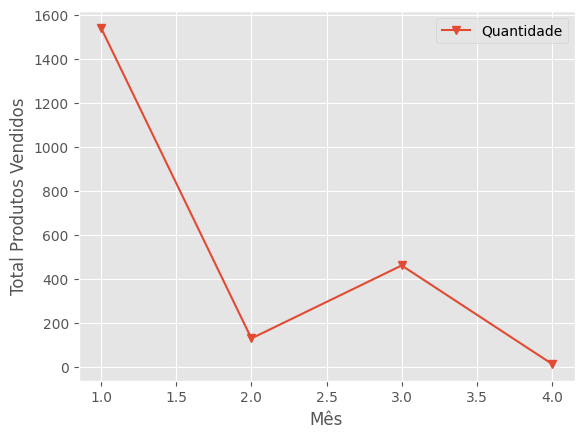

In [61]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend(['Quantidade']);

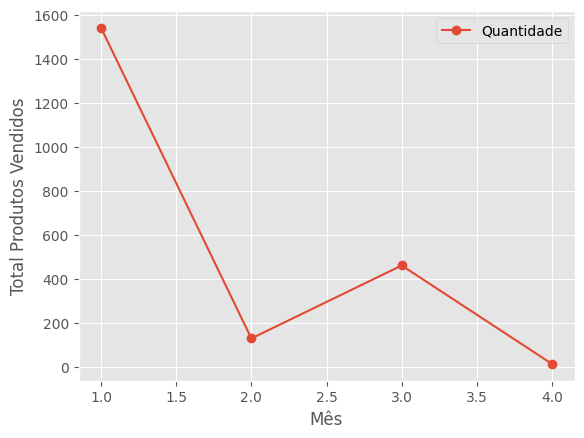

In [62]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend(['Quantidade']);

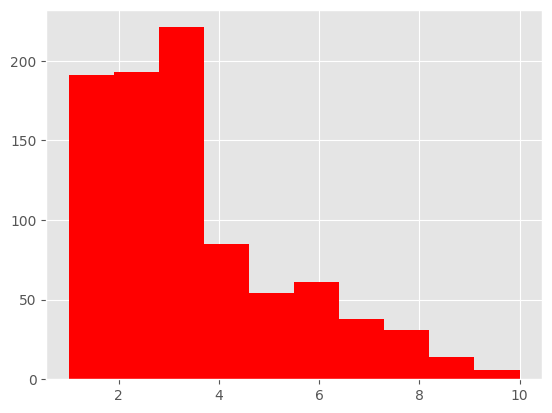

In [63]:
# Histograma
plt.hist(df['Qtde'], color='red');

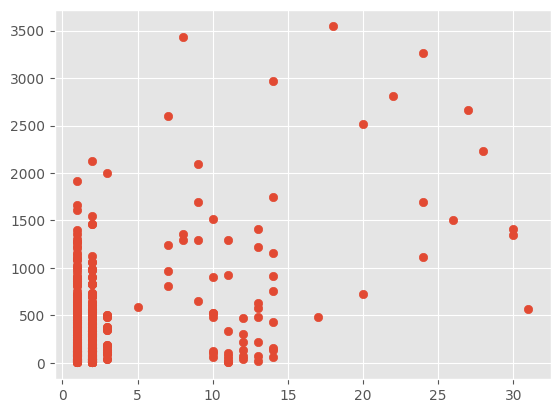

In [64]:
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita']);

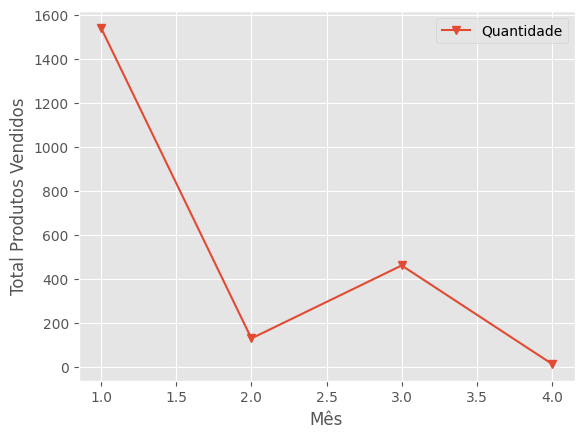

In [65]:
# Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend(['Quantidade']);
plt.savefig("grafico_Qtde_Mes.png")